In [ ]:
import pandas as pd

# 1. Carregamento dos dados

In [ ]:
icb1v = pd.read_csv('/content/icb1v14.csv')

In [ ]:
icb2v = pd.read_csv('/content/icb2v14.csv')

# 2. Limpeza e seleção

In [ ]:
cols_icb1 = [
    'crisno', 'crisname',   # Identificação
    'yrtrig', 'trigent',    # Ano e Quem começou
    'brexit',               # Duração (em dias)
    'geog',                 # Localização Geográfica
    'usinv', 'usactor',     # Intervenção dos EUA e Papel (Ator ou Terceiro)
    'powinv',               # Envolvimento de Superpotências
    'usefct', 'uspace',     # Eficácia e Impacto dos EUA no tempo
    'subout', 'outesr',     # Resultado e Tensão Futura
    'viol', 'sevviosy'      # Violência e Severidade
]

cols_icb2 = [
    'crisno', 'crisname',
    'actor',                # O país específico (ex: RUS, UKR, SYR)
    'usinv',                # Tipo de ação dos EUA percebida por este ator
    'usfavr',               # Os EUA favoreceram este ator? (1=Sim, 2=Não, 3=Neutro)
    'outcom',               # Resultado para este ator (ex: Vitória, Derrota)
    'sevvio'                # Severidade da violência usada por este ator
]

In [ ]:
icb1v_clean = icb1v[cols_icb1].copy()

In [ ]:
novos_nomes1 = {
    'crisno': 'id_crise',
    'crisname': 'nome_crise',
    'yrtrig': 'ano_inicio',
    'trigent': 'pais_iniciador_id',      # ID da entidade que iniciou o gatilho
    'brexit': 'duracao_dias',            # "Brexit" aqui significa duração, não o evento UK
    'geog': 'regiao_geografica',
    'usinv': 'tipo_intervencao_eua',     # Ex: Militar, Política, Sem intervenção
    'usactor': 'papel_eua',              # Se foi Ator principal ou Terceiro
    'powinv': 'envolvimento_superpotencias', # Envolvimento conjunto EUA/URSS
    'usefct': 'eficacia_eua',            # Se a ação ajudou a resolver ou piorou
    'uspace': 'impacto_tempo_eua',       # Se a ação acelerou ou atrasou o fim
    'subout': 'resultado_final',         # Ex: Vitória, Derrota, Compromisso
    'outesr': 'tensao_futura',           # Se a tensão escalou ou reduziu após a crise
    'viol': 'uso_violencia',             # Se houve violência (sim/não/nível)
    'sevviosy': 'intensidade_violencia'  # Gravidade (ex: guerra total vs escaramuça)
}

icb1v_clean.rename(columns=novos_nomes1, inplace=True)


In [ ]:
icb1v_clean

,id_crise,nome_crise,ano_inicio,pais_iniciador_id,duracao_dias,regiao_geografica,tipo_intervencao_eua,papel_eua,envolvimento_superpotencias,eficacia_eua,impacto_tempo_eua,resultado_final,tensao_futura,uso_violencia,intensidade_violencia
0,1,RUSSIAN CIVIL WAR I,1918.0,996.0,686.0,30.0,4.0,NaN,1.0,4.0,3.0,2.0,1.0,3.0,3.0
1,2,COSTA RICAN COUP,1918.0,94.0,467.0,42.0,3.0,NaN,1.0,6.0,4.0,2.0,2.0,1.0,1.0
2,3,RUSSIAN CIVIL WAR II,1918.0,997.0,462.0,30.0,2.0,NaN,1.0,3.0,3.0,2.0,1.0,3.0,3.0
3,4,BALTIC INDEPENDENCE,1918.0,366.0,632.0,34.0,2.0,NaN,1.0,3.0,3.0,2.0,2.0,3.0,3.0
4,5,TESCHEN,1919.0,290.0,560.0,31.0,2.0,NaN,1.0,5.0,4.0,1.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,KISANGANI CONFLICT,1999.0,997.0,823.0,24.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0,4.0,3.0
483,484,SERBIAN TRAIN INCIDENT,2017.0,345.0,19.0,35.0,2.0,1.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0
484,485,SHRINE LAL SHAHBAZ ATTACK,2017.0,996.0,101.0,13.0,2.0,1.0,2.0,3.0,3.0,1.0,3.0,2.0,2.0
485,486,SYIRA CHEMICAL WEAPONS II,2017.0,652.0,21.0,15.0,4.0,2.0,7.0,5.0,4.0,1.0,3.0,4.0,2.0


In [ ]:
icb2v_clean = icb2v[cols_icb2].copy()

In [ ]:
# Dicionário de mapeamento para o ICB2 (Nível de Ator)
novos_nomes_icb2 = {
    'crisno': 'id_crise',
    'crisname': 'nome_crise',
    'actor': 'pais_ator',                # O código do país (ex: USA, RUS)
    'usinv': 'tipo_intervencao_eua',     # Ação dos EUA no contexto da crise
    'usfavr': 'eua_favoreceu_ator',      # Variável chave: Os EUA ajudaram este país específico?
    'outcom': 'resultado_para_ator',     # Vitória, Derrota ou Compromisso (do ponto de vista do ator)
    'sevvio': 'violencia_usada_pelo_ator' # Nível de força que ESTE ator usou (diferente da violência global da crise)
}

icb2v_clean.rename(columns=novos_nomes_icb2, inplace=True)

In [ ]:
icb2v_clean

,id_crise,nome_crise,pais_ator,tipo_intervencao_eua,eua_favoreceu_ator,resultado_para_ator,violencia_usada_pelo_ator
0,1,RUSSIAN CIVIL WAR I,RUS,7.0,3.0,1.0,3.0
1,2,COSTA RICAN COUP,NIC,7.0,1.0,1.0,1.0
2,2,COSTA RICAN COUP,COS,7.0,3.0,4.0,1.0
3,3,RUSSIAN CIVIL WAR II,RUS,3.0,3.0,1.0,3.0
4,4,BALTIC INDEPENDENCE,RUS,3.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...
1073,486,SYRIA CHEMICAL WEAPONS II,RUS,8.0,3.0,3.0,1.0
1074,487,NORTH KOREA NUCLEAR VII,USA,9.0,3.0,2.0,1.0
1075,487,NORTH KOREA NUCLEAR VII,ROK,7.0,1.0,2.0,1.0
1076,487,NORTH KOREA NUCLEAR VII,JPN,7.0,1.0,3.0,1.0


# 4. Criação dos dados para visualizações


In [ ]:
import json

df = pd.read_csv('icb1v14.csv')

# 2. Filtrar apenas casos onde houve atividade dos EUA (usefct != 1 e != 9)
# 1 = Nenhuma atividade, 9 = Dados faltantes
df_us = df[(df['usefct'] != 1) & (df['usefct'] != 9)].copy()

# 3. Criar a lógica de Eficácia (Baseado no Codebook)
# 2 (Sem efeito) e 3 (Escalou) -> Ineficaz (Vermelho)
# 4, 5, 6 -> Eficaz (Azul)
def classificar_eficacia(codigo):
    if codigo in [2, 3]:
        return "Ineficaz/Escalada"
    elif codigo in [4, 5, 6]:
        return "Eficaz"
    return "Outro"

df_us['status'] = df_us['usefct'].apply(classificar_eficacia)
df_us['color'] = df_us['status'].apply(lambda x: "#e45756" if x == "Ineficaz/Escalada" else "#4c78a8")

# 4. Selecionar apenas o necessário para o gráfico ficar leve
# Adicionei 'crisname' para aparecer no Tooltip
df_export = df_us[['crisno', 'crisname', 'status', 'color']].rename(columns={
    'crisno': 'id',
    'crisname': 'nome'
})

# 5. Exportar para JSON (Copie o resultado ou salve em arquivo)
json_data = df_export.to_json(orient='records')

# Salvar em arquivo para fazer upload no Observable
with open('dados_icb_observable.json', 'w') as f:
    f.write(json_data)

print("Arquivo 'dados_icb_observable.json' criado com sucesso!")
print(f"Exemplo dos dados: {json_data[:200]}...") # Mostra o começo para conferir

Arquivo 'dados_icb_observable.json' criado com sucesso!
Exemplo dos dados: [{"id":1,"nome":"RUSSIAN CIVIL WAR I","status":"Eficaz","color":"#4c78a8"},{"id":2,"nome":"COSTA RICAN COUP","status":"Eficaz","color":"#4c78a8"},{"id":3,"nome":"RUSSIAN CIVIL WAR II","status":"Inefic...


In [ ]:
# 2. Filtrar intervenções dos EUA
# usinv != 1 (1 significa "Nenhuma atividade dos EUA")
# outesr != 9 (9 significa "Dados ausentes")
df_us_tension = df[
    (df['usinv'] != 1) &
    (df['outesr'].isin([1, 2]))  # 1=Redução, 2=Escalada
].copy()

# 3. Mapear os valores para texto legível
def classificar_tensao(codigo):
    if codigo == 1:
        return "Redução (Bombeiro)"
    elif codigo == 2:
        return "Escalada (Incendiário)"
    return "Outro"

df_us_tension['categoria'] = df_us_tension['outesr'].apply(classificar_tensao)

# Definir cores para o JSON (Azul para Redução, Laranja/Fogo para Escalada)
df_us_tension['color'] = df_us_tension['categoria'].apply(
    lambda x: "#4682B4" if x == "Redução (Bombeiro)" else "#FF4500"
)

# 4. Selecionar colunas e renomear
df_export = df_us_tension[['crisno', 'crisname', 'categoria', 'color']].rename(columns={
    'crisno': 'id',
    'crisname': 'nome'
})

# 5. Exportar para JSON
json_data = df_export.to_json(orient='records')

with open('dados_escalada_eua.json', 'w') as f:
    f.write(json_data)

# Estatísticas rápidas para você saber o que esperar
total = len(df_export)
escalada = len(df_export[df_export['categoria'] == 'Escalada (Incendiário)'])
ratio = (escalada / total) * 10

print(f"Arquivo 'dados_escalada_eua.json' criado.")
print(f"Total de casos analisados: {total}")
print(f"Casos de Escalada: {escalada}")
print(f"Proporção: A cada 10, ~{ratio:.1f} escalaram.")

Arquivo 'dados_escalada_eua.json' criado.
Total de casos analisados: 326
Casos de Escalada: 171
Proporção: A cada 10, ~5.2 escalaram.


In [ ]:
# 2. Filtrar intervenções dos EUA (usinv != 1)
df_us = df[df['usinv'] != 1].copy()

# 3. Mapear Regiões (Lógica completa para todos os registros)
def mapear_regiao(codigo):
    if 40 <= codigo <= 49:
        return "Americas"
    elif 30 <= codigo <= 39:
        return "Europe"
    elif codigo == 15 or codigo == 21:
        return "Middle East"
    elif 20 <= codigo <= 29:
        return "Africa"
    elif 10 <= codigo <= 19:
        return "Asia"
    else:
        return "Other"

df_us['regiao'] = df_us['geog'].apply(mapear_regiao)

# 4. Preparar para exportação (Sem agregar/resumir!)
# Selecionamos cada crise individualmente
df_export = df_us[['crisno', 'crisname', 'regiao']].rename(columns={
    'crisno': 'id',
    'crisname': 'nome',
    'regiao': 'region'
})

# 5. Exportar JSON Completo
json_data = df_export.to_json(orient='records')

with open('dados_geografia_full.json', 'w') as f:
    f.write(json_data)

print(f"Arquivo 'dados_geografia_full.json' gerado com {len(df_export)} registros.")

Arquivo 'dados_geografia_full.json' gerado com 333 registros.


In [ ]:
# yrtrig: Ano de Início
# viol: Nível de Violência (1=Baixa, 4=Guerra Total)

df_viol = df[['yrtrig', 'viol', 'usinv']].copy()
df_viol = df_viol[df_viol['usinv'] != 1]

# Remover dados faltantes (9)
df_viol = df_viol[df_viol['viol'] != 9]

# 3. Mapear os Códigos de Violência (Baseado no Codebook ICB)
def mapear_violencia(codigo):
    if codigo == 1:
        return "1. Sem Violência"
    elif codigo == 2:
        return "2. Escaramuças Menores"
    elif codigo == 3:
        return "3. Conflitos Sérios"
    elif codigo == 4:
        return "4. Guerra Total"
    return "Outro"

df_viol['categoria'] = df_viol['viol'].apply(mapear_violencia)

# 4. Criar Esqueleto de Continuidade (CRUCIAL para Stacked Area)
# Se não fizermos isso, anos sem guerra quebram o gráfico
anos = range(int(df_viol['yrtrig'].min()), int(df_viol['yrtrig'].max()) + 1)
categorias = ["1. Sem Violência", "2. Escaramuças Menores", "3. Conflitos Sérios", "4. Guerra Total"]

esqueleto = pd.DataFrame([(ano, cat) for ano in anos for cat in categorias], columns=['ano', 'categoria'])

# 5. Contar Ocorrências Reais
contagem_real = df_viol.groupby(['yrtrig', 'categoria']).size().reset_index(name='contagem')
contagem_real.rename(columns={'yrtrig': 'ano'}, inplace=True)

# 6. Juntar Esqueleto com Dados Reais (Preenchendo vazios com 0)
df_final = pd.merge(esqueleto, contagem_real, on=['ano', 'categoria'], how='left').fillna(0)
df_final['contagem'] = df_final['contagem'].astype(int)

# 7. Exportar
json_output = df_final.to_json(orient='records')
with open('dados_evolucao_violencia.json', 'w') as f:
    f.write(json_output)

print("Arquivo 'dados_evolucao_violencia.json' criado com sucesso!")
print(df_final.head())

Arquivo 'dados_evolucao_violencia.json' criado com sucesso!
    ano               categoria  contagem
0  1918        1. Sem Violência         1
1  1918  2. Escaramuças Menores         0
2  1918     3. Conflitos Sérios         3
3  1918         4. Guerra Total         0
4  1919        1. Sem Violência         0


/tmp/ipython-input-59280943.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['CRISMG_LABEL'] = df_mg['crismg'].map(crismg_labels)


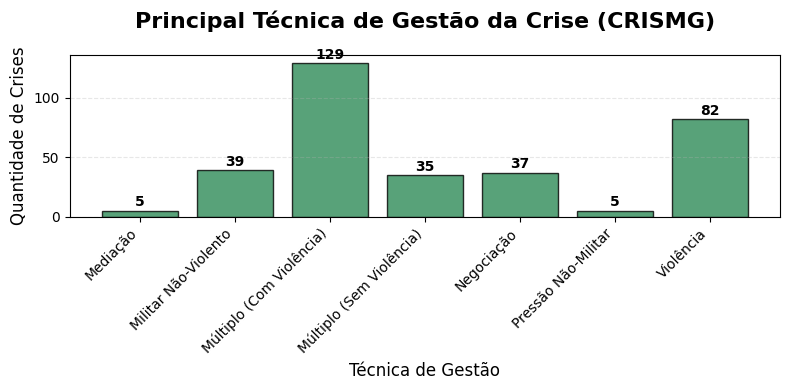

In [ ]:
# 1. Mapear os Códigos da Variável CRISMG (Variable 7)
crismg_labels = {
    1: "Negociação",
    2: "Adjudicação ou Arbitragem",
    3: "Mediação",
    4: "Múltiplo (Sem Violência)",
    5: "Pressão Não-Militar",
    6: "Militar Não-Violento",
    7: "Múltiplo (Com Violência)",
    8: "Violência"
}

# 2. Substituir números pelos rótulos
# Filtramos apenas os valores conhecidos (1-8)
df_mg = df[df['crismg'].isin(crismg_labels.keys())].copy()
df_mg = df[df['usinv'] != 1]


df_mg['CRISMG_LABEL'] = df_mg['crismg'].map(crismg_labels)

# 3. Contar a frequência
counts_mg = df_mg['CRISMG_LABEL'].value_counts().sort_index()

# 4. Configurar e Plotar o Gráfico
plt.figure(figsize=(8, 4))

# Usando uma cor diferente (ex: verde floresta) para diferenciar do gráfico anterior
bars = plt.bar(counts_mg.index, counts_mg.values, color='#2E8B57', edgecolor='black', alpha=0.8)

# Títulos e Rótulos
plt.title('Principal Técnica de Gestão da Crise (CRISMG)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Técnica de Gestão', fontsize=12)
plt.ylabel('Quantidade de Crises', fontsize=12)

# Rotação dos rótulos do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adicionar valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajustes finais
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
import json

try:
    # 1. Carregar Dataset
    df = pd.read_csv('icb1v14.csv')

    # Converter colunas para numérico para evitar erros de tipo
    df['usinv'] = pd.to_numeric(df['usinv'], errors='coerce').fillna(1)
    df['usactor'] = pd.to_numeric(df['usactor'], errors='coerce').fillna(2)
    df['period'] = pd.to_numeric(df['period'], errors='coerce')

    # 2. Mapeamento dos Períodos
    period_map = {
        1: "Multipolarity (1918-1939)",
        2: "World War II (1939-1945)",
        3: "Bipolarity (1945-1962)",
        4: "Polycentrism (1963-1989)",
        5: "Unipolarity (1990-)",
        6: "Period 6 (Undefined in v12)"
    }
    df['period_desc'] = df['period'].map(period_map)

    # 3. Classificar Atividade (Sua lógica exata)
    def categorize_activity(row):
        # Se for Ator (1) OU Intervenção Militar Direta (>=4) -> Militar
        if row['usactor'] == 1 or row['usinv'] >= 4:
            return 'Militar (Direta/Encoberta)'
        # Se for Baixo Nível (2) ou Encoberta/Semi (3) E não for ator -> Político/Econ
        elif row['usinv'] in [2, 3]:
            return 'Política/Econômica'
        else:
            return 'Nenhuma'

    df['activity_type'] = df.apply(categorize_activity, axis=1)

    # 4. Filtrar e Agrupar
    df_us = df[df['activity_type'] != 'Nenhuma'].copy()

    # Agrupa contando as ocorrências
    # Incluímos 'period' no agrupamento para ordenar corretamente depois
    df_grouped = df_us.groupby(['period', 'period_desc', 'activity_type']).size().reset_index(name='Quantidade')

    # 5. Preencher lacunas com 0 (Crucial para o gráfico de linha não quebrar)
    # Pivotar para preencher zeros
    df_pivot = df_grouped.pivot(index=['period', 'period_desc'], columns='activity_type', values='Quantidade').fillna(0).reset_index()

    # Derreter (Melt) de volta para formato longo (Tidy Data) que o Observable gosta
    df_final = df_pivot.melt(id_vars=['period', 'period_desc'], var_name='activity_type', value_name='Quantidade')

    # Ordenar por período numérico
    df_final = df_final.sort_values(['period', 'activity_type'])

    # 6. Exportar
    output_file = 'us_crises_periods.json'
    df_final.to_json(output_file, orient='records', force_ascii=False, indent=2)

    print(f"Sucesso! Arquivo '{output_file}' gerado.")
    print(df_final.head())

except FileNotFoundError:
    print("Erro: Arquivo 'icb1v14.csv' não encontrado.")
except Exception as e:
    print(f"Erro: {e}")

Sucesso! Arquivo 'us_crises_periods.json' gerado.
   period                period_desc               activity_type  Quantidade
0     1.0  Multipolarity (1918-1939)  Militar (Direta/Encoberta)           1
6     1.0  Multipolarity (1918-1939)          Política/Econômica          30
1     2.0   World War II (1939-1945)  Militar (Direta/Encoberta)          12
7     2.0   World War II (1939-1945)          Política/Econômica          15
2     3.0     Bipolarity (1945-1962)  Militar (Direta/Encoberta)          75


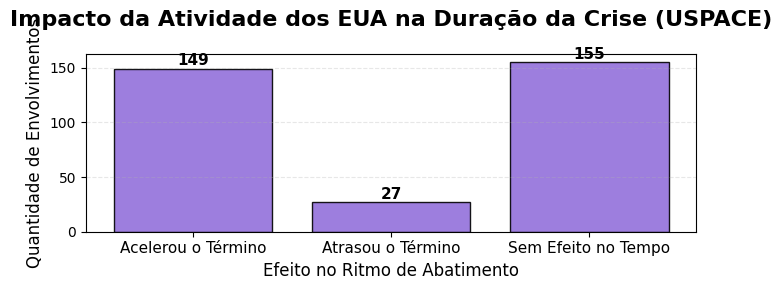

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar o Dataset
df = pd.read_csv('icb1v14.csv')


# 2. Filtrar e Mapear a Variável USPACE (Variable 23)
# Filtramos fora o valor 1 ("No U.S. activity") para mostrar apenas quando houve envolvimento
df_uspace = df[df['usinv'] != 1].copy()

# Mapeamento conforme Codebook V12
uspace_labels = {
    2: "Atrasou o Término",
    3: "Sem Efeito no Tempo",
    4: "Acelerou o Término"
}

# Aplicar o mapeamento
df_uspace['USPACE_LABEL'] = df_uspace['uspace'].map(uspace_labels)

# 3. Contar a frequência
counts_uspace = df_uspace['USPACE_LABEL'].value_counts().sort_index()

# 4. Configurar e Plotar o Gráfico
plt.figure(figsize=(7, 3))

# Criar barras (cor roxa para variar)
bars = plt.bar(counts_uspace.index, counts_uspace.values, color='#9370DB', edgecolor='black', alpha=0.9)

# Títulos e Rótulos
plt.title('Impacto da Atividade dos EUA na Duração da Crise (USPACE)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Efeito no Ritmo de Abatimento', fontsize=12)
plt.ylabel('Quantidade de Envolvimentos', fontsize=12)

# Ajustar rótulos do eixo X
plt.xticks(rotation=0, fontsize=11)

# Adicionar valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Ajustes finais
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# 5. Exibir
plt.show()

In [ ]:
try:
    # 1. Carregar o Dataset
    df = pd.read_csv('icb1v14.csv')

    # 2. Filtrar e Mapear a Variável USPACE
    # Filtramos fora o valor 1 ("No U.S. activity")
    df_uspace = df[df['usinv'] != 1].copy()

    # Mapeamento conforme Codebook
    uspace_labels = {
        2: "Atrasou o Término",
        3: "Sem Efeito no Tempo",
        4: "Acelerou o Término"
    }

    # Aplicar o mapeamento
    df_uspace['Label'] = df_uspace['uspace'].map(uspace_labels)

    # 3. Contar a frequência e estruturar para JSON
    # reset_index() transforma a Série em DataFrame com colunas 'Label' e 'count'
    df_counts = df_uspace['Label'].value_counts().sort_index().reset_index()
    df_counts.columns = ['Label', 'Frequency']

    # Remover labels nulos se houver
    df_counts = df_counts.dropna()

    # 4. Exportar para JSON
    # orient='records' cria o formato: [{"Label": "Atrasou...", "Frequency": 10}, ...]
    df_counts.to_json('uspace_data.json', orient='records', force_ascii=False, indent=2)

    print("Arquivo 'uspace_data.json' gerado com sucesso!")
    print(df_counts)

except FileNotFoundError:
    print("Erro: O arquivo 'icb1v14.csv' não foi encontrado.")

Arquivo 'uspace_data.json' gerado com sucesso!
                 Label  Frequency
0   Acelerou o Término        149
1    Atrasou o Término         27
2  Sem Efeito no Tempo        155


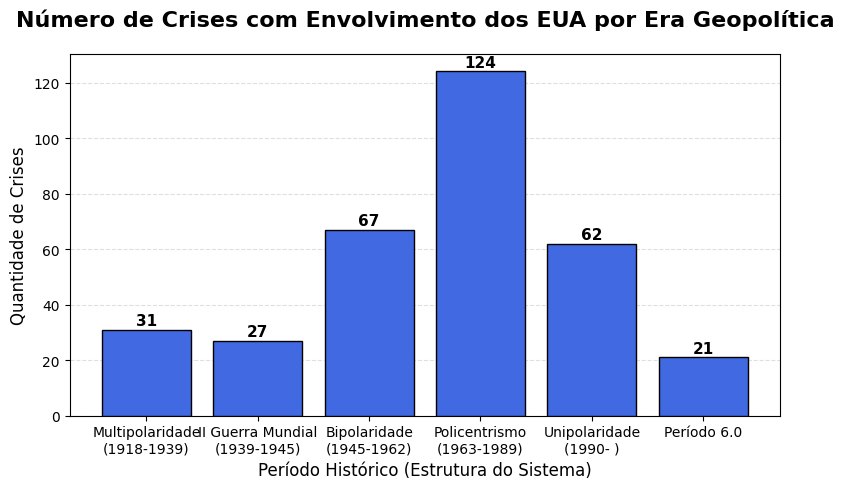

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar o Dataset
try:
    df = pd.read_csv('icb1v14.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'icb1v14.csv' não foi encontrado. Certifique-se que ele está na pasta.")
    # Dados de exemplo para ilustrar o funcionamento caso o arquivo falte

# 2. Filtrar Crises com Participação dos EUA
# USINV 1 = "U.S. not active". Removemos isso.
df_usa = df[df['usinv'] != 1].copy()

# 3. Mapear os Códigos de Período (Variable 58: PERIOD)
# A ordem cronológica é fundamental aqui (1 -> 5)
period_labels = {
    1: "Multipolaridade\n(1918-1939)",
    2: "II Guerra Mundial\n(1939-1945)",
    3: "Bipolaridade\n(1945-1962)",
    4: "Policentrismo\n(1963-1989)",
    5: "Unipolaridade\n(1990- )"
}

# 4. Processar os dados para o gráfico
# Agrupamos por 'PERIOD' numérico para ordenar, e pegamos a contagem
counts_series = df_usa['period'].value_counts().sort_index()

# Preparamos os rótulos baseados no índice ordenado
labels = [period_labels.get(i, f"Período {i}") for i in counts_series.index]
values = counts_series.values

# 5. Plotar o Gráfico
plt.figure(figsize=(8, 5))

# Barras em azul clássico
bars = plt.bar(labels, values, color='#4169E1', edgecolor='black', zorder=3)

# Títulos e Estilo
plt.title('Número de Crises com Envolvimento dos EUA por Era Geopolítica', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Período Histórico (Estrutura do Sistema)', fontsize=12)
plt.ylabel('Quantidade de Crises', fontsize=12)

# Adicionar grade atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Adicionar os valores exatos sobre as barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

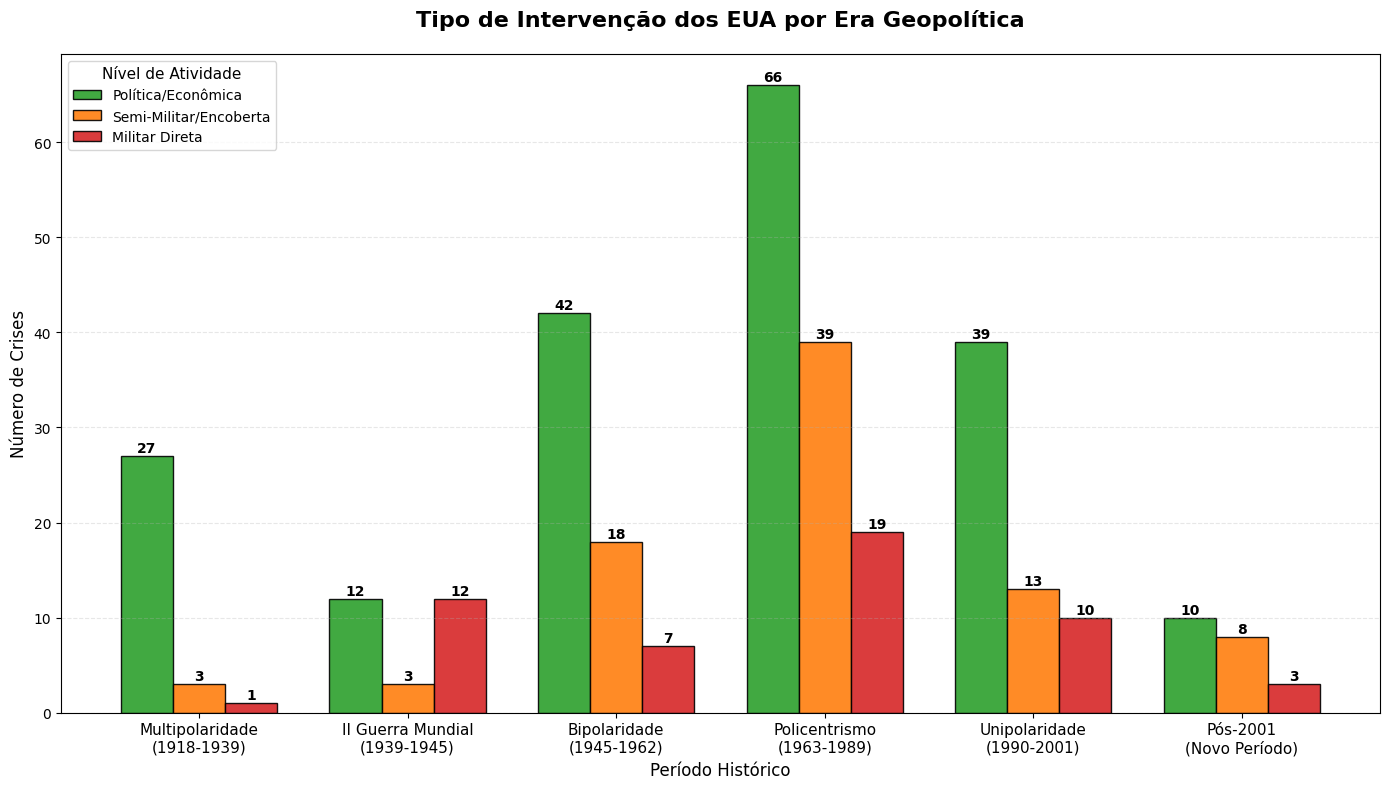

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('icb1v14.csv')


# 2. Filtrar Crises com Participação dos EUA (USINV != 1)
df_usa = df[df['usinv'] != 1].copy()

# 3. Mapear os Códigos
usinv_labels = {
    2: "Política/Econômica",
    3: "Semi-Militar/Encoberta",
    4: "Militar Direta"
}

# Dicionário de períodos atualizado e seguro
period_labels = {
    1: "Multipolaridade\n(1918-1939)",
    2: "II Guerra Mundial\n(1939-1945)",
    3: "Bipolaridade\n(1945-1962)",
    4: "Policentrismo\n(1963-1989)",
    5: "Unipolaridade\n(1990-2001)",
    6: "Pós-2001\n(Novo Período)"
}

df_usa['Atividade'] = df_usa['usinv'].map(usinv_labels)

# 4. Criar Tabela Cruzada
cross_tab = pd.crosstab(df_usa['period'], df_usa['Atividade'])

# Ordenação lógica das colunas
cols_order = [c for c in ["Política/Econômica", "Semi-Militar/Encoberta", "Militar Direta"] if c in cross_tab.columns]
cross_tab = cross_tab[cols_order]

# Preparação do Eixo X (Segura contra KeyErrors)
x = np.arange(len(cross_tab.index))
width = 0.25
# Se houver um código no índice que não está no dicionário, usa "Período X"
x_labels = [period_labels.get(p, f"Período {int(p)}") for p in cross_tab.index]

# 5. Plotar
plt.figure(figsize=(14, 8))
colors = {"Política/Econômica": "#2ca02c", "Semi-Militar/Encoberta": "#ff7f0e", "Militar Direta": "#d62728"}

for i, activity in enumerate(cross_tab.columns):
    offset = (i - 1) * width if len(cross_tab.columns) == 3 else (i - 0.5) * width
    counts = cross_tab[activity].values

    bars = plt.bar(x + offset, counts, width, label=activity, color=colors.get(activity, 'gray'), edgecolor='black', alpha=0.9)

    # Valores no topo
    for bar in bars:
        if bar.get_height() > 0:
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                     f'{int(bar.get_height())}',
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Tipo de Intervenção dos EUA por Era Geopolítica', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Período Histórico', fontsize=12)
plt.ylabel('Número de Crises', fontsize=12)
plt.xticks(x, x_labels, fontsize=11)
plt.legend(title='Nível de Atividade', title_fontsize='11', fontsize='10', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

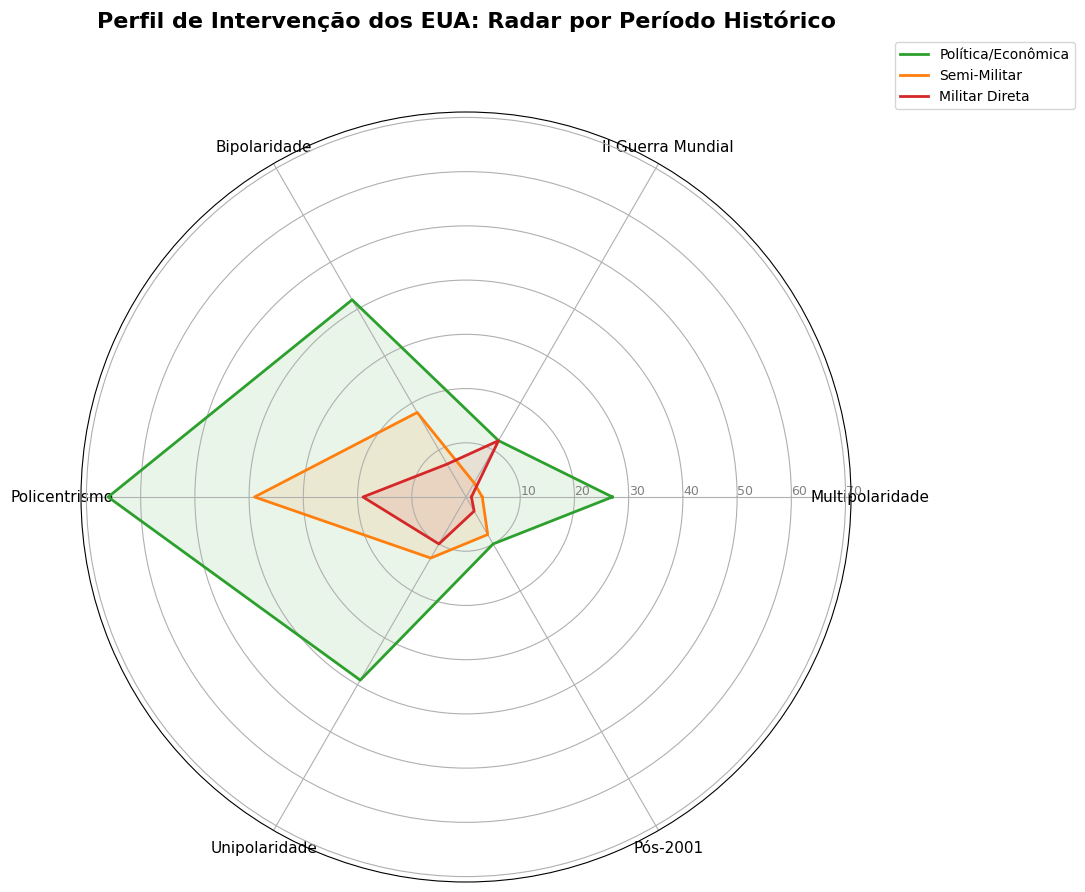

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('icb1v14.csv')


# 2. Filtrar Crises com Participação dos EUA
df_usa = df[df['usinv'] != 1].copy()

# 3. Mapear os Códigos
usinv_labels = {
    2: "Política/Econômica",
    3: "Semi-Militar",
    4: "Militar Direta"
}

period_labels = {
    1: "Multipolaridade",
    2: "II Guerra Mundial",
    3: "Bipolaridade",
    4: "Policentrismo",
    5: "Unipolaridade",
    6: "Pós-2001"
}

df_usa['Atividade'] = df_usa['usinv'].map(usinv_labels)
df_usa['Periodo'] = df_usa['period'].map(period_labels)

# 4. Criar Tabela Cruzada
cross_tab = pd.crosstab(df_usa['period'], df_usa['Atividade'])

# Ordenar colunas lógicamente
cols_order = [c for c in ["Política/Econômica", "Semi-Militar", "Militar Direta"] if c in cross_tab.columns]
cross_tab = cross_tab[cols_order]

# Preparar dados para o Radar Chart
# Eixos serão os Períodos
categories = [period_labels.get(p, str(p)) for p in cross_tab.index]
N = len(categories)

# Ângulos para cada eixo
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1] # Fechar o loop

# Inicializar o gráfico polar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Cores para as linhas (Tipos de Atividade)
colors = {"Política/Econômica": "#2ca02c", "Semi-Militar": "#ff7f0e", "Militar Direta": "#d62728"}

# Plotar cada Atividade
for activity in cross_tab.columns:
    values = cross_tab[activity].tolist()
    values += values[:1] # Fechar o loop

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=activity, color=colors.get(activity, 'blue'))
    ax.fill(angles, values, color=colors.get(activity, 'blue'), alpha=0.1)

# Ajustes dos Eixos
plt.xticks(angles[:-1], categories, size=11)

# Ajustar eixo Y (Radial)
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=9)
plt.ylim(0, cross_tab.max().max() + 5)

# Título e Legenda
plt.title('Perfil de Intervenção dos EUA: Radar por Período Histórico', size=16, weight='bold', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# 1. Carregar os Dados
# Substitua pelo caminho correto do seu arquivo ICB

df = pd.read_csv('icb1v14.csv')


# 2. Filtrar Intervenções dos EUA
# USINV != 1 (1 significa "No U.S. Activity")
df_us = df[df['usinv'] != 1].copy()

# 3. Dicionário de Mapeamento: Código ICB (GEOG) -> Coordenadas (Lat, Lon) e Nome
# Baseado no Codebook do ICB (Variable 13: GEOG)
icb_geog_map = {
    9:  {"Region": "Ásia Central", "Lat": 45.0, "Lon": 65.0},
    10: {"Region": "Ásia Ocidental", "Lat": 32.0, "Lon": 53.0}, # Irã/Afeganistão
    11: {"Region": "Ásia Oriental", "Lat": 35.0, "Lon": 105.0}, # China/Japão
    12: {"Region": "Sudeste Asiático", "Lat": 12.0, "Lon": 105.0}, # Vietnã/Indonésia
    13: {"Region": "Sul da Ásia", "Lat": 22.0, "Lon": 78.0},    # Índia/Paquistão
    14: {"Region": "Ásia (Geral)", "Lat": 30.0, "Lon": 90.0},
    15: {"Region": "Oriente Médio", "Lat": 29.0, "Lon": 42.0},  # Israel/Egito/Iraque
    20: {"Region": "África Ocidental", "Lat": 10.0, "Lon": 0.0},
    21: {"Region": "Norte da África", "Lat": 28.0, "Lon": 15.0},
    22: {"Region": "África Oriental", "Lat": 0.0, "Lon": 38.0},
    23: {"Region": "África Austral", "Lat": -25.0, "Lon": 25.0},
    24: {"Region": "África Central", "Lat": 0.0, "Lon": 20.0},
    30: {"Region": "Euro-Ásia (URSS)", "Lat": 55.0, "Lon": 40.0},
    31: {"Region": "Europa Oriental", "Lat": 50.0, "Lon": 20.0},
    32: {"Region": "Europa Central", "Lat": 48.0, "Lon": 15.0},
    33: {"Region": "Europa Ocidental", "Lat": 47.0, "Lon": 2.0},
    34: {"Region": "Europa do Norte", "Lat": 60.0, "Lon": 15.0},
    35: {"Region": "Europa do Sul", "Lat": 40.0, "Lon": 15.0},
    41: {"Region": "América do Norte", "Lat": 40.0, "Lon": -100.0},
    42: {"Region": "América Central/Caribe", "Lat": 18.0, "Lon": -75.0},
    43: {"Region": "América do Sul", "Lat": -15.0, "Lon": -60.0},
    51: {"Region": "Australásia/Oceania", "Lat": -25.0, "Lon": 135.0}
}

# 4. Aplicar o Mapeamento
# Criar colunas temporárias para o merge/map
df_us['Region_Name'] = df_us['geog'].map(lambda x: icb_geog_map.get(x, {}).get("Region", "Outro"))
df_us['Lat'] = df_us['geog'].map(lambda x: icb_geog_map.get(x, {}).get("Lat", np.nan))
df_us['Lon'] = df_us['geog'].map(lambda x: icb_geog_map.get(x, {}).get("Lon", np.nan))

# Remover regiões desconhecidas
df_us = df_us.dropna(subset=['Lat', 'Lon'])

# 5. Agregar os Dados por Região
# Calculamos:
# - Count: Quantas crises ocorreram na região
# - Mean VIOL: A média da violência (1 a 4)
# - Max VIOL: A pior violência registrada
df_grouped = df_us.groupby(['Region_Name', 'Lat', 'Lon']).agg(
    Crises_Count=('usinv', 'count'),
    Avg_Violence=('viol', 'mean'),
    Max_Violence=('viol', 'max')
).reset_index()

# Arredondar média
df_grouped['Avg_Violence'] = df_grouped['Avg_Violence'].round(2)

# Mapear Labels de Violência para a legenda
def get_violence_label(val):
    if val < 1.5: return "Menor / Sem Violência"
    elif val < 2.5: return "Confrontos Menores"
    elif val < 3.5: return "Confrontos Sérios"
    else: return "Guerra Total"

df_grouped['Violence_Category'] = df_grouped['Avg_Violence'].apply(get_violence_label)

# 6. Criar o Mapa
fig = px.scatter_geo(
    df_grouped,
    lat='Lat',
    lon='Lon',
    size='Crises_Count',            # Tamanho da bolha = Quantidade de Crises
    color='Avg_Violence',           # Cor = Nível de Violência
    hover_name='Region_Name',
    hover_data={'Lat': False, 'Lon': False, 'Max_Violence': True, 'Avg_Violence': True},
    color_continuous_scale='Reds',  # Escala de cor: Vermelho fraco a forte
    projection="natural earth",
    title="Geografia das Crises com Envolvimento dos EUA (Nível de Violência)",
    size_max=50                     # Tamanho máximo das bolhas
)

# Estilização
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Nível Médio de Violência<br>(1=Nenhuma, 4=Guerra)",
        tickvals=[1, 2, 3, 4],
        ticktext=["1 - Sem Violência", "2 - Menor", "3 - Sério", "4 - Guerra Total"]
    ),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="Gray",
        projection_type='equirectangular' # Planisfério padrão
    )
)

fig.show()

In [ ]:
import pandas as pd
import json

# ==============================================================================
# 1. CARREGAR E MAPEAMENTO (PAÍS -> REGIÃO)
# ==============================================================================
try:
    # Usamos o dataset de orçamento como "Gabrito" para as regiões
    df_budget = pd.read_csv("us_foreign_budget_complete (1).csv")

    # Criar dicionário de mapeamento: Nome do País -> Nome da Região
    mapping_source = df_budget[['Country Name', 'Region Name']].dropna().drop_duplicates()
    country_to_region = dict(zip(mapping_source['Country Name'], mapping_source['Region Name']))

    # Correções manuais para nomes que diferem entre os arquivos (Exemplos comuns)
    manual_fixes = {
        'South Korea': 'East Asia and Oceania',
        'United Kingdom': 'Europe and Eurasia',
        'Saudi Arabia': 'Middle East and North Africa',
        'Spain': 'Europe and Eurasia',
        'Taiwan': 'East Asia and Oceania',
        'Israel': 'Middle East and North Africa'
    }
    country_to_region.update(manual_fixes)

except FileNotFoundError:
    print("Erro: Arquivo de orçamento não encontrado.")
    country_to_region = {}

# ==============================================================================
# 2. PROCESSAR DADOS DE AJUDA (BUDGET)
# ==============================================================================
# Filtra 'Peace and Security' para focar em ajuda civil/desenvolvimento
df_aid = df_budget[
    (df_budget['US Category Name'] != 'Peace and Security') &
    (df_budget['Country Name'] != 'World')
].copy()

# Agrupa por Região
df_aid_grouped = df_aid.groupby('Region Name')['current_amount'].sum().reset_index()
df_aid_grouped.rename(columns={'Region Name': 'Target', 'current_amount': 'Amount'}, inplace=True)
df_aid_grouped['Source'] = 'Ajuda Humanitária (EUA)'

# ==============================================================================
# 3. PROCESSAR DADOS DE ARMAS (SALES)
# ==============================================================================
try:
    df_arms = pd.read_csv("ArmsSales.csv")

    # Mapeia o país para a região usando nosso dicionário
    df_arms['Target'] = df_arms['Country'].map(country_to_region)

    # Preenche quem não foi encontrado (nomes diferentes ou territórios menores)
    df_arms['Target'] = df_arms['Target'].fillna('Outros / Não Identificado')

    # Limpeza de valores
    df_arms['Deliveries'] = pd.to_numeric(df_arms['Deliveries'], errors='coerce').fillna(0)

    # Agrupa por Região
    df_arms_grouped = df_arms.groupby('Target')['Deliveries'].sum().reset_index()
    df_arms_grouped.rename(columns={'Deliveries': 'Amount'}, inplace=True)
    df_arms_grouped['Source'] = 'Venda de Armas (EUA)'

except FileNotFoundError:
    print("Erro: Arquivo ArmsSales.csv não encontrado.")
    df_arms_grouped = pd.DataFrame()

# ==============================================================================
# 4. UNIFICAR E EXPORTAR
# ==============================================================================
df_final = pd.concat([df_arms_grouped, df_aid_grouped], ignore_index=True)

# Converter para Milhões
df_final['Amount'] = df_final['Amount'] / 1_000_000
df_final = df_final.sort_values('Amount', ascending=False)

# Exportar JSON
data_json = df_final.to_dict(orient='records')
with open('fluxo_eua_regioes.json', 'w', encoding='utf-8') as f:
    json.dump(data_json, f, ensure_ascii=False, indent=2)

print("Arquivo 'fluxo_eua_regioes.json' gerado com sucesso!")
print(df_final.head())

Arquivo 'fluxo_eua_regioes.json' gerado com sucesso!
                          Target         Amount                   Source
11            Sub-Saharan Africa  134093.924313  Ajuda Humanitária (EUA)
3      Outros / Não Identificado  124710.537627     Venda de Armas (EUA)
2   Middle East and North Africa  115113.542819     Venda de Armas (EUA)
0          East Asia and Oceania   90231.799328     Venda de Armas (EUA)
10        South and Central Asia   80604.314930  Ajuda Humanitária (EUA)
